In [96]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
import tarfile

In [35]:
PATH = 'dataset/'
TRAIN_FOLDS = ['fold_frontal_0_data.txt', 'fold_frontal_1_data.txt', 'fold_frontal_2_data.txt', 'fold_frontal_3_data.txt']
TEST_FOLD = 'fold_frontal_4_data.txt'

# Read the data

In [37]:
train_fold_0 = pd.read_csv(os.path.join(PATH, TRAIN_FOLDS[0]), encoding= 'utf-8')
train_fold_1 = pd.read_csv(os.path.join(PATH, TRAIN_FOLDS[0]), encoding= 'utf-8')
train_fold_2 = pd.read_csv(os.path.join(PATH, TRAIN_FOLDS[0]), encoding= 'utf-8')
train_fold_3 = pd.read_csv(os.path.join(PATH, TRAIN_FOLDS[0]), encoding= 'utf-8')

In [43]:
print(f'{train_fold_0}\n')
print(f'{train_fold_1}\n')
print(f'{train_fold_2}\n')
print(f'{train_fold_3}\n')

           user_id                original_image  face_id       age gender  \
0     30601258@N03  10424815813_e94629b1ec_o.jpg        2   (25|32)      m   
1     30601258@N03  10437979845_5985be4b26_o.jpg        3   (25|32)      m   
2     30601258@N03  11816644924_075c3d8d59_o.jpg        2   (25|32)      m   
3     30601258@N03  10424595844_1009c687e4_o.jpg        4   (38|43)      f   
4     30601258@N03  10190308156_5c748ab2da_o.jpg        2   (25|32)      m   
...            ...                           ...      ...       ...    ...   
3205  54030085@N03  11455981046_a7a9e126f6_o.jpg      473   (48|53)      f   
3206  54030085@N03  11445137504_ecf213effe_o.jpg      474   (25|32)      m   
3207  37404707@N08  11128849885_6a56d25762_o.jpg      909    (8|12)    NaN   
3208  37404707@N08  11182710183_e75c82dde1_o.jpg      910  (60|100)    NaN   
3209  37404707@N08  11129028253_2e9d0c4b18_o.jpg      909    (8|12)    NaN   

         x     y    dx    dy  tilt_ang  fiducial_yaw_angle  fid

In [75]:
train_df = pd.concat([train_fold_0, train_fold_1, train_fold_2, train_fold_3])
train_df.drop_duplicates(inplace= True)
train_df.head(3)

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10424815813_e94629b1ec_o.jpg,2,(25|32),m,301,105,640,641,0,0,94
1,30601258@N03,10437979845_5985be4b26_o.jpg,3,(25|32),m,752,1255,484,485,180,0,47
2,30601258@N03,11816644924_075c3d8d59_o.jpg,2,(25|32),m,175,80,769,768,-75,0,34


## Make age groups

In [76]:
#'(0|2)' -> 0, '(4|6)' -> 1, '(8|12)' -> 2, '(15|20)' -> 3, '(25|32)' -> 4, '(38|43)' -> 5, '(38|48)' -> 5, '(48|53)' -> 6, '(60|100)' -> 7

unique_age_groups = np.sort(train_df['age'].unique())
unique_age_groups

array(['(0|2)', '(15|20)', '(25|32)', '(38|43)', '(38|48)', '(48|53)',
       '(4|6)', '(60|100)', '(8|12)', '13', '3', '35', '36', '45', '55',
       '58', 'None'], dtype=object)

In [87]:
train_df['age'] = train_df['age'].map({'(0|2)' : 0, '(4|6)' : 1, '(8|12)' : 2, '(15|20)' : 3, 
                                       '(25|32)' : 4, '(38|43)' : 5, '(38|48)' : 5, '(48|53)' : 6,
                                       '(60|100)' : 7, '13': 2, '3': 1, '35': 5, '36': 5, '45': 6,
                                       '55': 7, '58': 7, 'None': -1})


In [88]:
unique_age_groups = np.sort(train_df['age'].unique())
unique_age_groups

array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64)

In [90]:
no_gender_df = train_df[train_df['gender'].isna()]
no_gender_df.head(3)

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
988,37303189@N08,10295123316_9e9f19b7ce_o.jpg,92,-1,NaN,637,951,485,484,-80,0,20
1383,10044155@N06,11345807533_ab928c065a_o.jpg,154,-1,NaN,1571,1035,663,663,180,0,14
2465,113528649@N08,11760388013_15a013288d_o.jpg,334,-1,NaN,1541,1184,522,522,170,0,104


# EDA

In [91]:
train_df.describe()

,face_id,age,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
count,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.0,3210.000000
mean,200.276636,2.930841,886.262305,670.450779,706.145171,700.176324,-7.784112,0.0,78.622741
std,240.706068,2.117655,620.056927,463.671625,475.448291,454.485429,83.597370,0.0,38.929994
min,1.000000,-1.000000,0.000000,0.000000,120.000000,119.000000,-200.000000,0.0,5.000000
25%,18.000000,1.000000,379.000000,299.000000,383.000000,383.000000,-85.000000,0.0,50.000000
50%,186.000000,4.000000,801.000000,629.000000,612.000000,608.000000,-5.000000,0.0,75.000000
75%,321.000000,4.000000,1310.750000,990.500000,831.250000,835.000000,10.000000,0.0,105.750000
max,2242.000000,7.000000,3044.000000,2752.000000,3264.000000,3225.000000,265.000000,0.0,206.000000


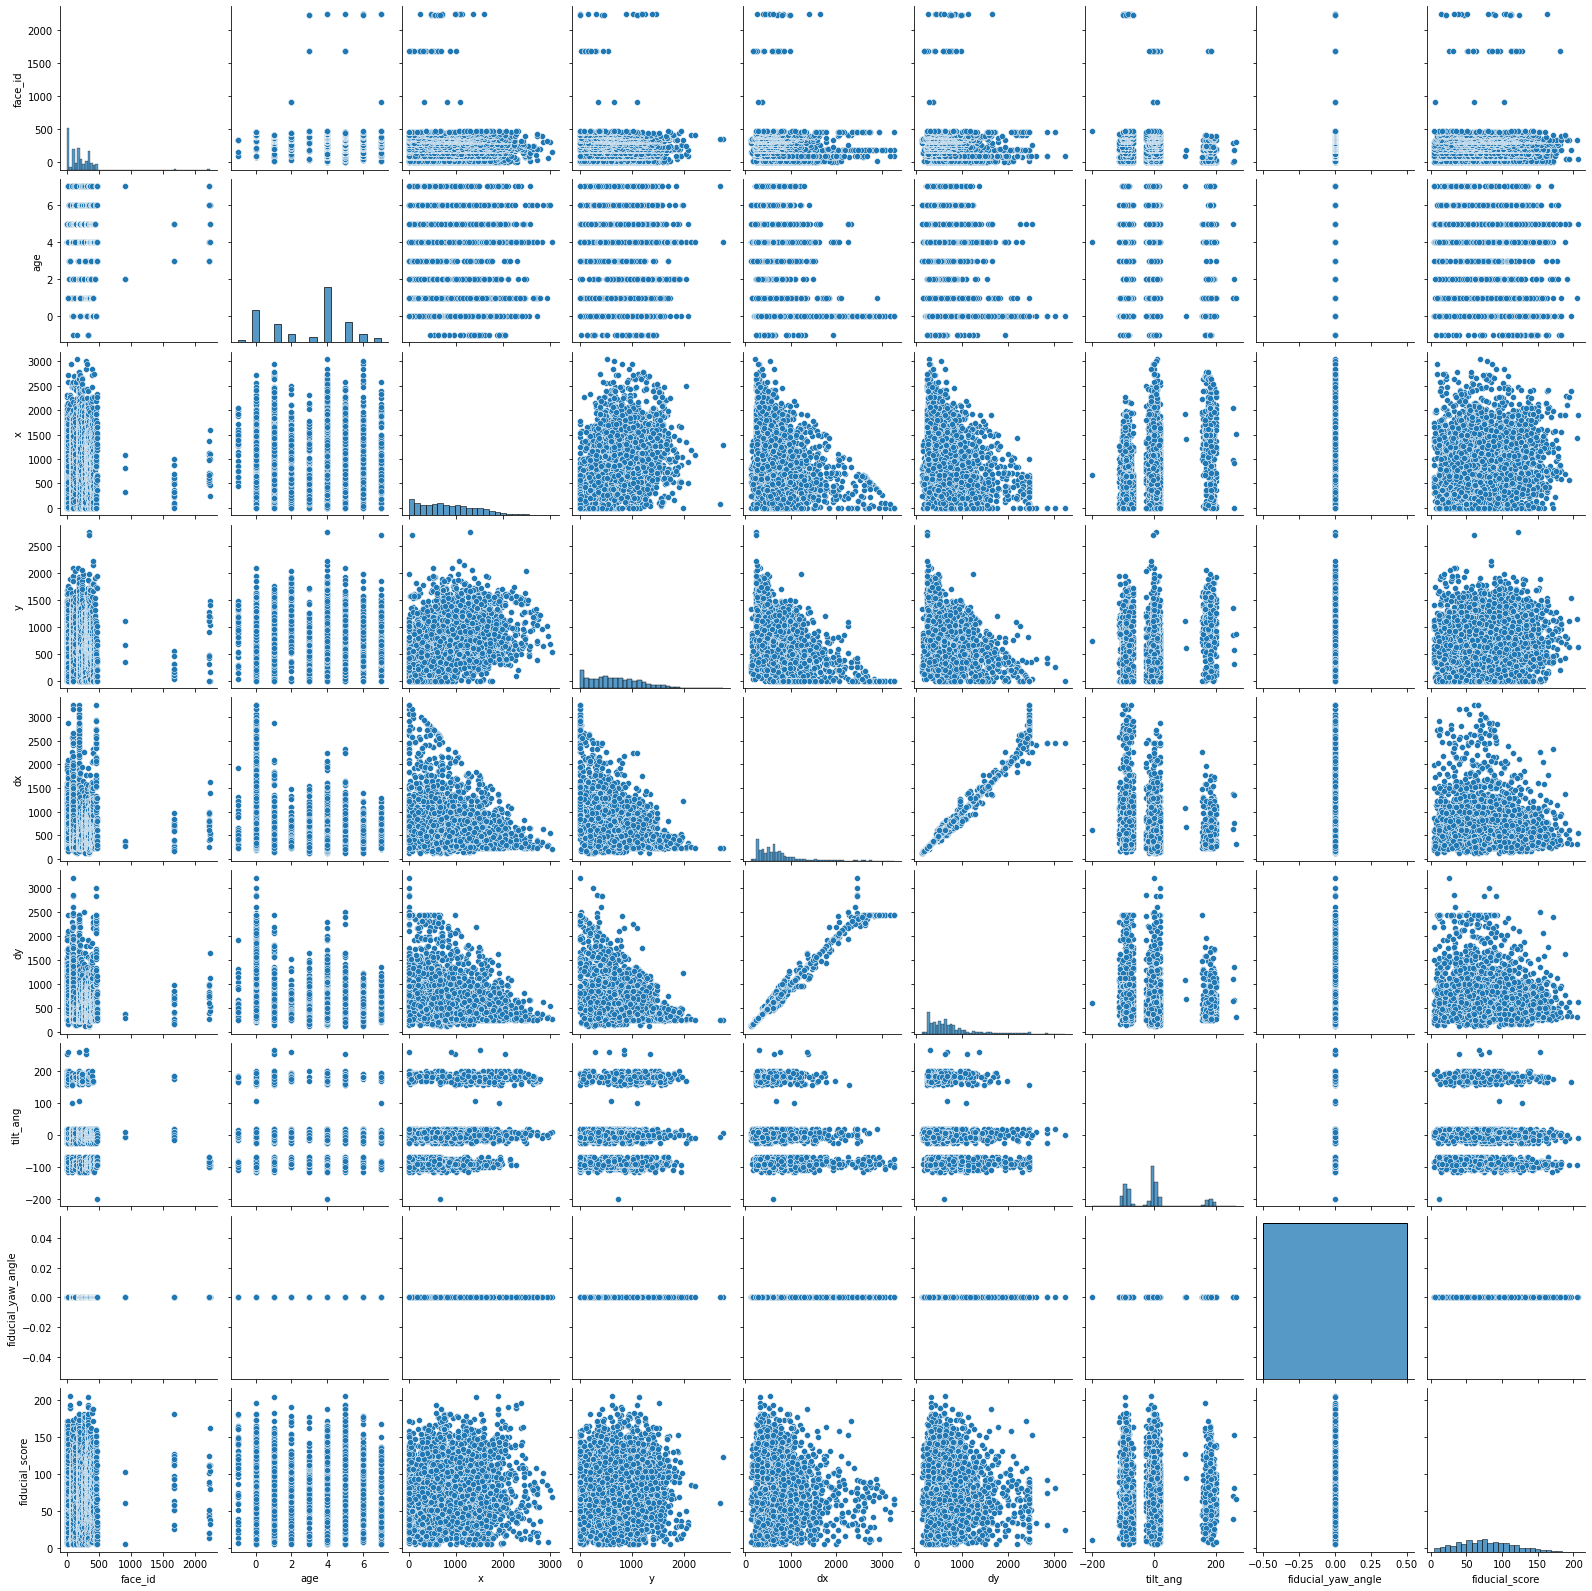

In [92]:
sns.pairplot(train_df)

<AxesSubplot:>

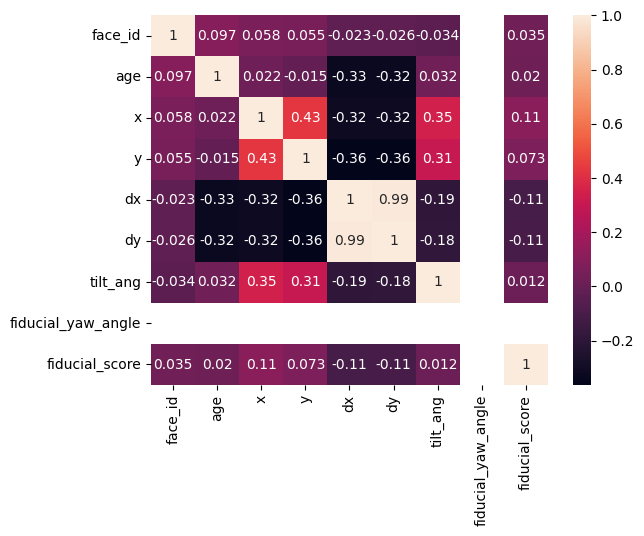

In [94]:
sns.heatmap(train_df.corr(), annot= True)

In [102]:
train_df.shape, train_df.isna().sum()

((3210, 12),
 user_id                0
 original_image         0
 face_id                0
 age                    0
 gender                47
 x                      0
 y                      0
 dx                     0
 dy                     0
 tilt_ang               0
 fiducial_yaw_angle     0
 fiducial_score         0
 dtype: int64)

In [103]:
train_df = train_df.dropna()
train_df.to_csv(os.path.join(PATH, 'train.csv'))